# Image Sort (Smaller Sample)

- Since the image files are 45GB The provisional model will be trained using a smaller image set that preserves the distribution of unique disease labels.

- This code assumes that the code file is nested in the same level as the `images*` files. 



## Import Dependencies 

In [1]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import chain

In [3]:
# Import the Data_Entry_2017.csv file 

all_images_df = pd.read_csv('Data_Entry_2017.csv')
all_images_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


## Clean the Data_Entry_2017 File 

Pair the images in the `Image Index` with their respective paths.  

In [4]:
# Get the paths for the images stored in the image files and store them as a dictionary
# Make the keys the image file names using os.path.basename() so it's paired. 
# Count the number of total images needed from the data entry file's image index column. 

total_images =  len(all_images_df["Image Index"])

all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join("images*", "*", "*.png"))}
print(f"Images found:{len(all_image_paths)} / Total Images: {total_images}")

Images found:0 / Total Images: 112120


In [4]:
# Make a new column to store the paths
# Get the values = paths stored in the all_image_paths dictionary by using Image Index column as the key! 
# Check the new column to make sure the index and the paths match. Use Sample to randomly sample across the df. 

all_images_df["path"] = all_images_df["Image Index"].map(all_image_paths.get)
all_images_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
70098,00017258_002.png,Effusion,2,17258,22,F,PA,2992,2991,0.143000,0.143000,NaN,images_008\images\00017258_002.png
97371,00025689_000.png,Atelectasis|Infiltration,0,25689,64,M,PA,2992,2991,0.143000,0.143000,NaN,images_011\images\00025689_000.png
37230,00009827_003.png,No Finding,3,9827,72,F,AP,3056,2544,0.139000,0.139000,NaN,images_005\images\00009827_003.png
20619,00005520_003.png,No Finding,3,5520,44,M,PA,2622,2991,0.143000,0.143000,NaN,images_003\images\00005520_003.png
98812,00026127_001.png,No Finding,1,26127,71,M,AP,3056,2544,0.139000,0.139000,NaN,images_011\images\00026127_001.png
99591,00026371_001.png,No Finding,1,26371,33,F,PA,1875,2021,0.194311,0.194311,NaN,images_011\images\00026371_001.png
88285,00021840_013.png,Effusion|Emphysema,13,21840,59,F,PA,2992,2991,0.143000,0.143000,NaN,images_010\images\00021840_013.png
2779,00000740_001.png,No Finding,1,740,80,M,AP,2500,2048,0.171000,0.171000,NaN,images_001\images\00000740_001.png
77836,00019124_069.png,No Finding,69,19124,53,F,PA,2992,2991,0.143000,0.143000,NaN,images_009\images\00019124_069.png
109269,00029701_000.png,No Finding,0,29701,59,F,AP,3056,2544,0.139000,0.139000,NaN,images_012\images\00029701_000.png


In [5]:
# Check Dtypes to see if transformations need to be made. 
all_images_df.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
path                            object
dtype: object

In [6]:
# Check Unnamed column 
all_images_df["Unnamed: 11"].isnull().sum()

112120

Maybe take the Unnamed out later? 

## Filter DF based on Unique Disease Labels

- The provisional code will only focus on some of the unique diseases. 

- Extract the images based on the desired diseases. 

- Comorbidities must be cleaned. 


In [7]:
# Check Disease labels and turn the result into a df 

label_counts = all_images_df["Finding Labels"].value_counts()
label_counts

No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: Finding Labels, Length: 836, dtype: int64

In [8]:
# Loop through each word within the strings(values) of the column and extract the single disease diagnoses.
# Single diseases don't have '|' in their values.
# First loop through values in the column and split the comorbidities as individual string values

all_images_df['Finding Labels'].map(lambda x: x.split('|'))

0                    [Cardiomegaly]
1         [Cardiomegaly, Emphysema]
2          [Cardiomegaly, Effusion]
3                      [No Finding]
4                          [Hernia]
                    ...            
112115            [Mass, Pneumonia]
112116                 [No Finding]
112117                 [No Finding]
112118                 [No Finding]
112119                 [No Finding]
Name: Finding Labels, Length: 112120, dtype: object

In [9]:
# Iterate over each individual value within the results and list the unique values.
# transform the comorbidities from object to list first 
# Include * in the it.chain() function first otherwise it won't loop over the individual lists within the list of values 

all_diseases = list(chain(*all_images_df['Finding Labels'].map(lambda x: x.split('|')).tolist()))
unique_diseases = np.unique(all_diseases).tolist()
unique_diseases

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [39]:
# Filter the original df using the labels of unique diseases 

fil_images_df = all_images_df[all_images_df["Finding Labels"].isin(unique_diseases)]
fil_label_counts = fil_images_df["Finding Labels"].value_counts().sort_values(ascending=False)
fil_label_counts

No Finding            60361
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: Finding Labels, dtype: int64

In [37]:
disease_freq = round(100*((fil_label_counts[1:].sum())/(fil_label_counts.sum())))
print(f"The disease frequency is {disease_freq}% of the dataset")

The disease frequency is 34% of the dataset


In [42]:
# Creating Weights based solely on diseased data
total = fil_label_counts[1:].sum()

disease_weights = fil_label_counts[1:].transform(lambda x: x/total)
disease_weights


Infiltration          0.308336
Atelectasis           0.136130
Effusion              0.127733
Nodule                0.087362
Pneumothorax          0.070859
Mass                  0.069082
Consolidation         0.042309
Pleural_Thickening    0.036366
Cardiomegaly          0.035300
Emphysema             0.028809
Fibrosis              0.023480
Edema                 0.020282
Pneumonia             0.010400
Hernia                0.003553
Name: Finding Labels, dtype: float64

In [55]:
fil_images_df["weights"] = fil_images_df.loc[:,"Finding Labels"]= disease_weights.get

c:\Users\Fabalin\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Fabalin\Anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


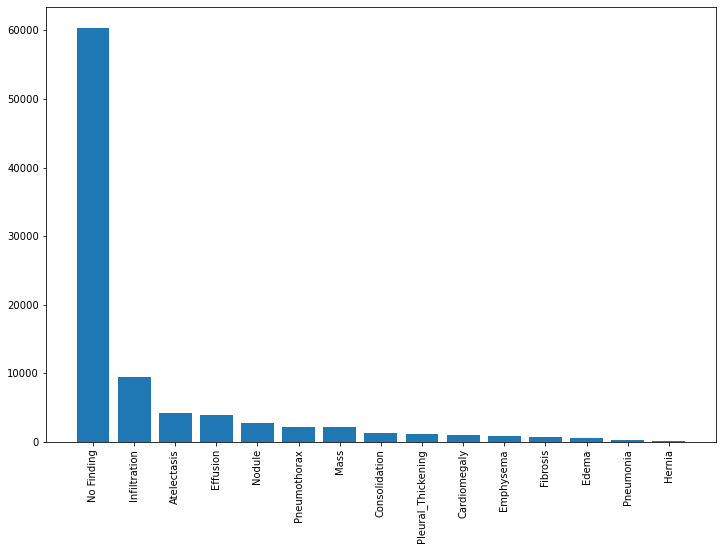

In [13]:
# See their distribution to get an idea 

fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(fil_label_counts))+0.5, fil_label_counts)
ax1.set_xticks(np.arange(len(fil_label_counts))+0.5)
_ = ax1.set_xticklabels(fil_label_counts.index, rotation = 90)

### Use The `test_list.txt` And `train_list.txt` Files as References Prior to Sampling

This ensures that the both the train and test lists would have equal proportions of the data to be stratified. 

In [15]:
# Create a function to open and extract the list of desired images from each text file. 

def get_desired_images(txt_file):
    
    # Open the file #cookie jar  
    open_file = open(txt_file, "r")
    
    # List contents by reading and turning new lines into different list items. 
    listify = open_file.read().split("\n")

    # Close the #cookie jar 
    open_file.close()
    
    return listify 

In [16]:
# Define the path for the text files for train and test sets. 

test_file = os.path.join("test_list.txt")
train_file = os.path.join("train_val_list.txt")

In [20]:
# Create Lists
test_list = get_desired_images(test_file)
train_list = get_desired_images(train_file)
len(test_list)

25596

In [23]:
# Filter the original df using Train and Test lists prior to sampling 

test_images_df = fil_images_df[all_images_df["Image Index"].isin(test_list)]
test_label_counts = test_images_df["Finding Labels"].value_counts().sort_values(ascending=False)
test_label_counts


c:\Users\Fabalin\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


No Finding            9861
Infiltration          2220
Effusion              1167
Pneumothorax           953
Atelectasis            801
Consolidation          481
Nodule                 457
Mass                   443
Cardiomegaly           316
Pleural_Thickening     309
Emphysema              305
Edema                  231
Fibrosis               176
Pneumonia               88
Hernia                  45
Name: Finding Labels, dtype: int64

In [26]:
# Filter the original df using Train and Test lists prior to sampling 

train_images_df = fil_images_df[fil_images_df["Image Index"].isin(train_list)]
train_label_counts = train_images_df["Finding Labels"].value_counts().sort_values(ascending=False)
train_label_counts

No Finding            50500
Infiltration           7327
Atelectasis            3414
Effusion               2788
Nodule                 2248
Mass                   1696
Pneumothorax           1241
Consolidation           829
Pleural_Thickening      817
Cardiomegaly            777
Emphysema               587
Fibrosis                551
Edema                   397
Pneumonia               234
Hernia                   65
Name: Finding Labels, dtype: int64

In [31]:
# Sum of all items in both lists
test_sum = test_label_counts.sum()
train_sum = train_label_counts.sum()

print(f"There are {test_sum} Test Images and {train_sum} Train Images")

There are 17853 Test Images and 73471 Train Images


In [34]:
# Calculate the total disease image counts for each set to get proportions 
d_test_sum = test_label_counts[1:].sum()
d_train_sum = train_label_counts[1:].sum()

print(f"There are {d_test_sum} Diseased Test Images and {d_train_sum} Diseased Train Images.")
print(f"That is {round(100*(d_test_sum/test_sum))} % of the test_list and {round(100*(d_train_sum/train_sum))} % of the train_list respectively.")


There are 7992 Diseased Test Images and 22971 Diseased Train Images.
That is 45 % of the test_list and 31 % of the train_list respectively.


To ensure that the model gets properly trained on data to identify disease, the data will be stratified proportionally based on the diseased images' weights. The No Findings data can be added onto each samples to introduce noise... currently it will be 34% of each of the total samples for the train and test lists. 

Target Disease Samples = 300 for provisional model 
80% = 240 Train images stratified based on disease weights + 80 No Finding Images
20% = 60 Test images stratified based on disease weights + 20 No Finding Images 

Total Samples = 400 Images